# Поиск инсайтов и точек роста (сервис доставки еды «Всё.из.кафе»)

- Автор: Логинов Павел Александрович
- Дата: 19.08.2025

### Введение

Нам необходимо помочь бизнесу ответить на следующие вопросы:

- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

В рамках данного проекта мы проведём комплексный анализ данных:

- изучим пользовательский путь и проанализируем конверсии через воронки;
- сегментируем пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуем рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

---

## 1. Загрузка данных и их предобработка

Начнём с загрузки библиотек `pandas` (для работы со структурированными табличными данными), `matplotlib.pyplot` (для визуализации данных), `numpy` (для работы с массивами и выполнения математических операций), `seaborn` (для создания статистических графиков), `matplotlib.colors` (для работы с цветами), `sklearn.cluster` (для проведения кластеризации) и датасета `insides_data.csv`

In [1]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans

In [2]:
# Выгружаем данные в переменные

try:
    df = pd.read_csv('C:/Users/Student/Desktop/insides_data.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv')

Познакомимся с данными датасета `insides_data.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран

df.head()

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [4]:
# Выводим информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


Датафрейм `df` содержит 15 столбцов и 205510 строк, в котором представлена информация о данных сервиса доставки еды "Всё.из.кафе"

В датафрейме присутствуют пропуски в следующих столбцах:

- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

Поскольку в датафрейме представлена информация не только о зарегистрированных пользователях, но и об идентификаторах посетителя, которые присваиваются системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет. Также стоит учесть тот факт, что датафрейм содержит информацию о разных типах событий, отличных от целевого действия (заказа). Исходя из этого можно сделать вывод о том, что не все строки датафрейма содержат информацию о ресторанах, блюдах, заказах, выручке, стоимости доставки и комиссии с выручки ресторана. Соответственно, пропуски в данных строках сложно заполнить какими-либо средними/медианными значениями, поскольку произвольный выбор подобного значения может привести к некорректному анализу и ошибочным выводам

Несоответствие типа данных наблюдается в столбцах:

- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных. 
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.

Число с плавающей точкой не подходит для отражения идентификатора - он должен быть представлен в виде целого числа

- `first_date` — дата первого посещения продукта.
- `datetime` — дата и время события.

Столбцы с информацией о дате и времени должны обладать типом данных `datetime64`

In [5]:
# Меняем тип данных

df['user_id'] = df['user_id'].astype(int)
df['object_id'] = df['user_id'].astype(int)
df['order_id'] = df['user_id'].astype(int)

df['first_date'] = pd.to_datetime(df['first_date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Выводим информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  int64         
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     205510 non-null  int64         
 11  order_id      205510 non-null  int64         
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
dtypes: datetime64[ns]

Далее проверим датафрейм на наличие дубликатов

In [6]:
# Проверяем данные на наличие дубликатов

duplicates_df = df.duplicated().sum()

print(duplicates_df)

0


Датафрейм не содержит полные дубликаты

Далее проверим значения столбцов категориальных данных

In [7]:
# Проверяем значения столбцов категориальных данных во всех датафреймах

name_device_type =  df['device_type'].unique()
name_source = df['source'].unique()
name_event = df['event'].unique()

print(name_device_type)
print()
print(name_source)
print()
print(name_event)

['Desktop' 'Mobile']

['Source_B' 'organic' 'Source_A' 'Source_C']

['authorization' 'reg_page' 'confirm_phone' 'login' 'main_page'
 'object_page' 'add_to_cart' 'order']


Все значения - корректны и не повторяются из-за различных стилей написания

Таким образом, датафреймы подготовлены к дальнейшему анализу:

- Дубликаты - отсутствуют
- Значения категориальных данных - корректны
- Столбцы, которые содержат информацию об идентификаторах, приведены к корректному типу данных `int64`
- Столбцы, которые содержат информацию о дате и времени, приведены к корректному типу данных `datetime64`
- Тип данных имеющихся столбцов соответствуют характеру данных

Теперь можно приступать к следующим шагам анализа данных

---

## 2. Анализ пользовательского пути

Построим и визуализируем общую воронку (по всем данным), затем опишем пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении построим две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

Начнём с построения **классической** воронки, которая будет отражать долю от первого шага в процентах. Представим её в виде таблицы, куда также добавим **step-by-step** воронку для удобства анализа и построения визуализации

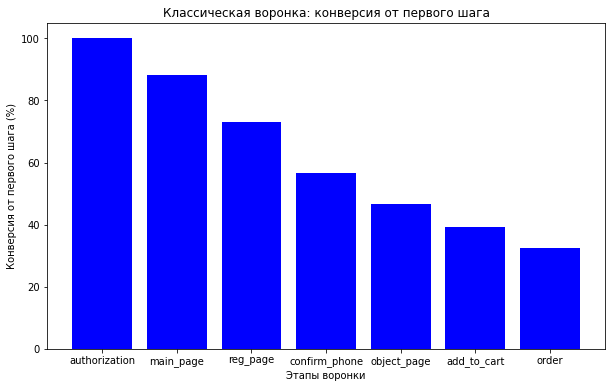

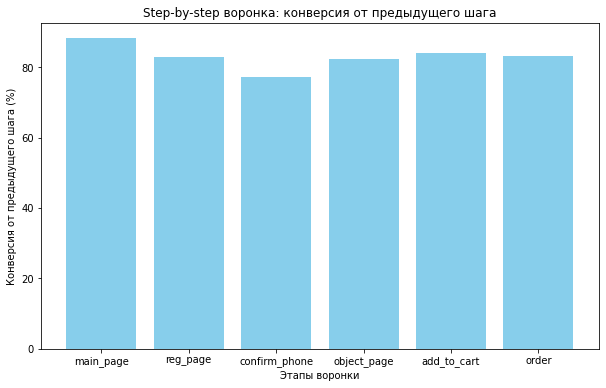

            step  users  conversion_from_first_%  conversion_from_previous_%
0  authorization   7410                    100.0                         NaN
1      main_page   6537                     88.2                        88.2
2       reg_page   5417                     73.1                        82.9
3  confirm_phone   4190                     56.5                        77.3
4    object_page   3453                     46.6                        82.4
5    add_to_cart   2899                     39.1                        84.0
6          order   2416                     32.6                        83.3


In [8]:
# Задаем порядок шагов в воронке
funnel_steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']

# Фильтруем датасет оставляя только нужные шаги воронки
funnel_df_steps = df[df['event'].isin(funnel_steps)]

# Считаем число уникальных пользователей на каждом шаге
funnel_counts = funnel_df_steps.groupby('event')['user_id'].nunique().reindex(funnel_steps)

# Собираем таблицу воронки
funnel_df = pd.DataFrame({
   'step': funnel_steps,
   'users': funnel_counts.values
})


# Строим классическую воронку

funnel_df['conversion_from_first_%'] = (funnel_df['users'] / funnel_df['users'].iloc[0] * 100).round(1)

# Визуализируем классическую воронку

plt.figure(figsize=(10, 6))
plt.bar(funnel_df['step'], funnel_df['conversion_from_first_%'], color='blue')
plt.title('Классическая воронка: конверсия от первого шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

# Строим step-by-step воронку

funnel_df['conversion_from_previous_%'] = (funnel_df['users'] / funnel_df['users'].shift(1) * 100).round(1)

# Визуализируем step-by-step воронку

plt.figure(figsize=(10, 6))
plt.bar(funnel_df['step'][1:], funnel_df['conversion_from_previous_%'][1:], color='skyblue')
plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

# Выводим таблицу воронки

print(funnel_df)

После построения **классической** воронки можно увидеть, что конверсия шагов от первого шага изменяется стабильно, без резких снижений. Конверсия в целевое действие (`order`) составляет 32% - с данной метрикой стоит поработать для увеличения прибыли компании

После построения **step-by-step** воронки мы обратили внимание, что на этапе подтверждения телефона (`confirm_phone`) происходит большая потеря пользователей. Возможно, проблема возникает не на всех типах устройств, а только некоторых

Далее сравним пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого построим и визуализируем **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.

Для этого мы построим **step-by-step** воронку относительно предыдущего шага отдельно для мобильной и десктоптной версии

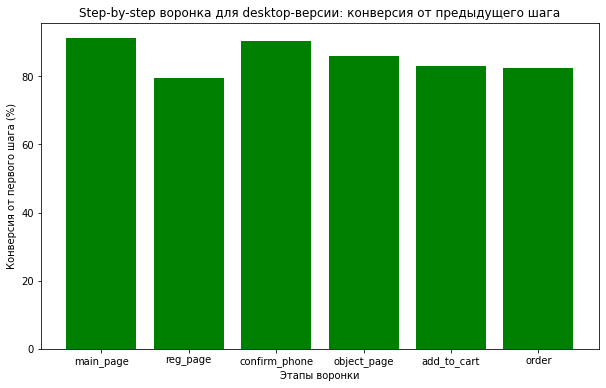

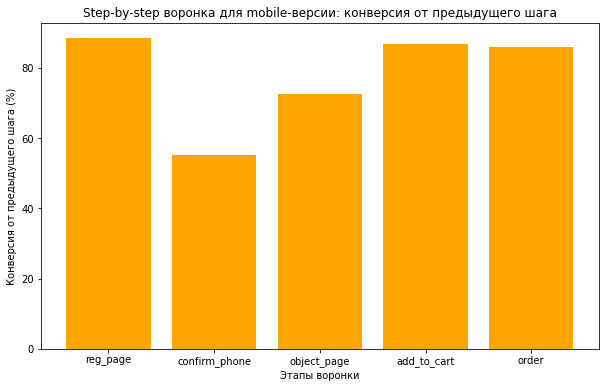

            step  mobile  desktop
0      main_page    83.3     91.1
1       reg_page    88.4     79.4
2  confirm_phone    55.1     90.2
3    object_page    72.5     85.8
4    add_to_cart    86.7     82.9
5          order    85.8     82.3


In [9]:
# Разделим данные по платформам

desktop_df = df[(df['device_type'] == 'Desktop') & (df['event'].isin(funnel_steps))]
mobile_df = df[(df['device_type'] == 'Mobile') & (df['event'].isin(funnel_steps))]

# Фильтруем датасет, оставляя только нужные шаги воронки для desktop

counts_desktop = desktop_df[desktop_df['event'].isin(funnel_steps)]

# Считаем количество клиентов на каждом шаге

counts_desktop_agg = counts_desktop.groupby('event')['user_id'].nunique().reindex(funnel_steps).reset_index()

# Считаем конверсию для desktop и округляем значение до 1 знака после запятой

desktop_funnel = counts_desktop_agg['user_id'] / counts_desktop_agg['user_id'].shift(1) * 100

# Повторяем шаги для mobile

counts_mobile = mobile_df[mobile_df['event'].isin(funnel_steps)]
counts_mobile_agg = counts_mobile.groupby('event')['user_id'].nunique().reindex(funnel_steps).reset_index()
mobile_funnel = counts_mobile_agg['user_id'] / counts_mobile_agg['user_id'].shift(1) * 100

# Соберём через словарь данные в датафрейм и исключим первый шаг для каждого элемента

funnel_compare = pd.DataFrame({
   'step': funnel_steps[1:],
   'mobile': mobile_funnel[1:].round(1).values,
   'desktop': desktop_funnel[1:].round(1).values
})

# Визуализируем desktop-версию

plt.figure(figsize=(10, 6))
plt.bar(funnel_compare['step'], funnel_compare['desktop'], color='green')
plt.title('Step-by-step воронка для desktop-версии: конверсия от предыдущего шага')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

# Визуализируем mobile-версию

plt.figure(figsize=(10, 6))
plt.bar(funnel_compare['step'][1:], funnel_compare['mobile'][1:], color='orange')
plt.title('Step-by-step воронка для mobile-версии: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

# Выводим таблицу воронки

print(funnel_compare)

После построения **step-by-step** воронки относительно предыдущего шага отдельно для мобильной и десктоптной версии мы видим, что основная потеря аудитории происходит на этапе перехода от страницы регистрации к подтверждению телефона (55% мобильных пользователей продолжают путь, в то время как на десктопной версии это делают 90% десктопных пользователей) и от подтверждения телефона к странице с блюдом (72% мобильных пользователей продолжают путь, в то время как на десктопной версии это делают 85% десктопных пользователей) именно для мобильной версии. Это наиболее ярко выраженное расхождение между платформами - именно здесь происходит основная потеря мобильной аудитории.

Чтобы лучше понять поведение пользователей, нужно разобраться, сколько времени у них уходит на переход от одного шага к другому. Возможно, причина кроется в том, что пользователям просто неудобно переходить по интерфейсу. Для этого построим таблицу с медианным временем, которое тратят пользователи с десктопных и мобильных устройств на переход от одного этапа воронки к следующему, и визуализируем её

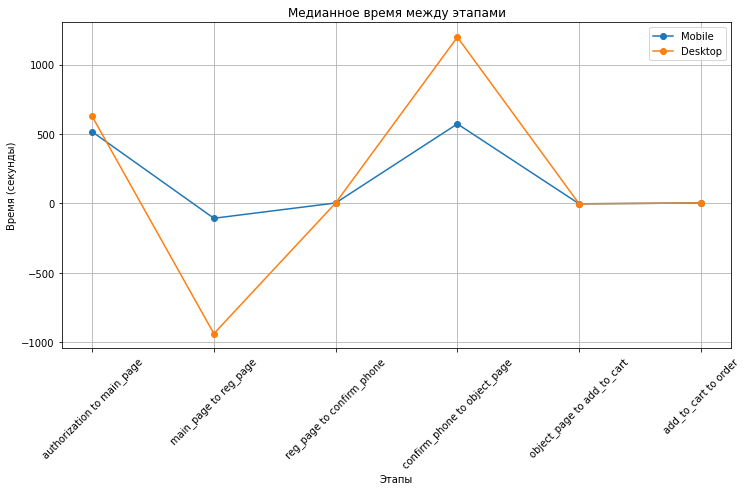

                           step  desktop_users_median_sec  \
0    authorization to main_page                     627.0   
1         main_page to reg_page                    -938.0   
2     reg_page to confirm_phone                       3.0   
3  confirm_phone to object_page                    1197.0   
4    object_page to add_to_cart                      -3.0   
5          add_to_cart to order                       3.0   

   mobile_users_median_sec  
0                    516.0  
1                   -107.0  
2                      3.0  
3                    572.5  
4                     -3.0  
5                      3.0  


In [10]:
# Получаем списки пользователей по платформам

desktop_ids = df[df['device_type'] == 'Desktop']['user_id'].unique()
mobile_ids = df[df['device_type'] == 'Mobile']['user_id'].unique()

# Словари для хранения медианных времён

deltas_mobile = {}
deltas_desktop = {}

# Цикл по парам шагов воронки

for i in range(1, len(funnel_steps)):
   step1 = funnel_steps[i - 1]
   step2 = funnel_steps[i]
    
   # Для пользователей с desktop фильтруем данные первого шага

   t1_desktop = df[(df['event'] == step1) & (df['device_type'] == 'Desktop')]
    
   # Для пользователей с desktop фильтруем данные второго шага

   t2_desktop = df[(df['event'] == step2) & (df['device_type'] == 'Desktop')]
    
   # Фильтруем, оставляя только user_id с desktop_ids
   t1_desktop = t1_desktop[t1_desktop['user_id'].isin(desktop_ids)]
   t2_desktop = t2_desktop[t2_desktop['user_id'].isin(desktop_ids)]

   # Объединяем датасеты
    
   t_desktop = pd.merge(t1_desktop, t2_desktop, on='user_id', suffixes=('_start', '_end'))

   # Считаем время между шагами
    
   delta_desktop = (t_desktop['datetime_end'] - t_desktop['datetime_start']).dt.total_seconds()

   # Считаем медианное время между шагами и округляем до 1 знака после запятой
    
   deltas_desktop[f'{step1} to {step2}'] = round(delta_desktop.median(), 1)
    
   # Для пользователей с mobile фильтруем данные первого шага

   t1_mobile = df[(df['event'] == step1) & (df['device_type'] == 'Mobile')]
    
   # Для пользователей с mobile фильтруем данные второго шага

   t2_mobile = df[(df['event'] == step2) & (df['device_type'] == 'Mobile')]
    
   # Фильтруем, оставляя только user_id с mobile_ids

   t1_mobile = t1_mobile[t1_mobile['user_id'].isin(mobile_ids)]
   t2_mobile = t2_mobile[t2_mobile['user_id'].isin(mobile_ids)]

   # Объединяем датасеты
    
   t_mobile = pd.merge(t1_mobile, t2_mobile, on='user_id', suffixes=('_start', '_end'))

   # Считаем время между шагами
    
   delta_mobile = (t_mobile['datetime_end'] - t_mobile['datetime_start']).dt.total_seconds()

   # Считаем медианное время между шагами и округляем до 1 знака после запятой
    
   deltas_mobile[f'{step1} to {step2}'] = round(delta_mobile.median(), 1)

# Через словарь собираем в таблицу

comparison_df = pd.DataFrame({
   'step': list(deltas_mobile.keys()),
   'desktop_users_median_sec': list(deltas_desktop.values()),
   'mobile_users_median_sec': list(deltas_mobile.values())
})

# Визуализируем таблицу с медианным временем

plt.figure(figsize=(12, 6))

# Строим linechart для mobile_users_median_sec по шагам

plt.plot(comparison_df['step'], comparison_df['mobile_users_median_sec'], 
         marker='o', label='Mobile')

# Строим linechart для desktop_users_median_sec по шагам

plt.plot(comparison_df['step'], comparison_df['desktop_users_median_sec'], 
         marker='o', label='Desktop')

plt.title('Медианное время между этапами')
plt.xlabel('Этапы')
plt.xticks(rotation=45)
plt.ylabel('Время (секунды)')
plt.legend()
plt.grid(True)
plt.show()

# Выводим результат

print(comparison_df)

pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.expand_frame_repr', False)  # Не переносить строки

На этапе `reg_page → confirm_page` у мобильных пользователей самая низкая конверсия (55%), но на этапе `confirm_page → object_page` наибольшее медианное время ожидания перехода с одного этапа воронки к следующему - у десктопных пользователей (выше чем у мобильных пользователей почти на 2 минуты). Это может говорить о трудностях при переходе к подтверждению телефона: вероятно, интерфейс неудобен, долго загружается или содержит лишние поля. Упрощение UI/UX — логичный первый шаг для роста конверсии

Таким образом, мы можем сделать следующие выводы:

- **Классическая** воронка показала, что конверсия шагов от первого шага изменяется стабильно, без резких снижений. Однако стоит обратить внимание на показатель конверсии целевого действия - он составляет 32%. Данный показатель требует к себе особого внимания, поскольку именно он влияет на размер общей выручки компании

- **Step-by-step** воронка показала, что на этапе подтверждения телефона (``confirm_phone``) происходит большая потеря пользователей именно на мобильной версии - 45% пользователей не продолжают путь к целевому действию (`order`)

- Изучение времени на переход от одного шага воронки к другому показало, что десктопные пользователи испытывают больше трудностей при переходе к подтверждению телефона (затрачивают на данный переход практически на 2 минуты больше, чем мобильные пользователи)

---

## 3. RFM сегментация

Для запуска рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы, необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям:

- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установим **03 июля 2021 года**.

После этого построим три гистограммы и проанализируем их

Начнём с небольшого исследовательского анализа и построим гистограммы значений столбцов `recency`, `frequency`, `monetary_value`. Это поможет определить, какие подходы применить для сегментации  

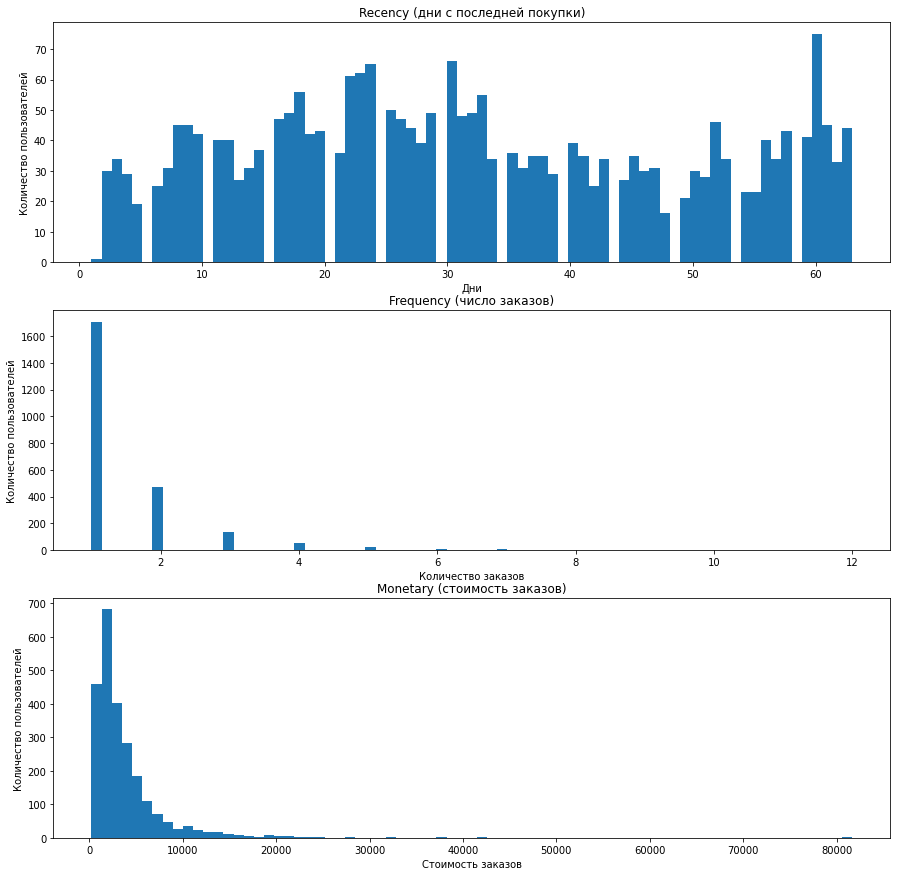

In [11]:
# Оставляем только события целевого действия order

df_order = df[df['event'] == 'order'].copy()

# Рассчитываем количество дней с покупки до анализа:

df_order['order_recency'] = pd.to_datetime('2021-07-03') - pd.to_datetime(df_order['datetime'].dt.date)

# Группируем данные для каждого пользователя и рассчитываем данные для RFM-анализа:

df_order_rfm = df_order.groupby('user_id').agg(
    
    # Количество дней с последнего заказа:
    
    recency = ('order_recency', lambda x: x.min().days),
    
    # Количество заказов за период времени:
    
    frequency = ('datetime', 'count'),
    
    # Сумма стоимости всех заказов:
    
    monetary_value = ('revenue', 'sum')
).reset_index()

# Строим три гистограммы

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Давность

axes[0].hist(df_order_rfm['recency'], bins=75)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

# Частота

axes[1].hist(df_order_rfm['frequency'], bins=75)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

# Сумма всех заказов

axes[2].hist(df_order_rfm['monetary_value'], bins=75)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

# Визуализируем гистограммы

plt.show()

Проанализируем получившиеся графики

Диапазон значений метрики `Recency` - от 1 до 63 дней с последней покупки без смещения к определённым значениям. Значит, отсутствует преобладание пользователи, которые совершили покупку давно или совсем недавно. Это может говорить о равномерной степени вовлечённости части аудитории. Для сегментации по этому признаку используем разбиение на равные интервалы, что получить простой и понятный результат: деление пользователей на тех, кто покупал давно, у кого прошло какое-то время или кто покупал совсем недавно

График метрики `Frequency` показывает, что число заказов варьируется в меньшем диапазоне, от 1 до 12, но преобладают пользователи с количеством покупок от 1 до 3. Для сегментации можно применить разбиение на три группы:

- пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
- пользователи с 2 заказами (F-сегмент со средним количеством заказов);
- пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).

Распределение метрики `Monetary` также смещено в левую сторону — резко преобладают пользователи с заказами до 10.000 рублей. Для сегментации по этому признаку применим перцентили: разделим значения по 33 и 66% перцентилям распределения. Это позволит учесть вариативность значений и разделить пользователей на три примерно равных сегмента

Выделим **RFM-сегменты** и изучим распределение пользователей по ним
    
Применим следующие подходы к выделению RFM сегментов:
- **Recency** — разделим на три равные группы.
- **Frequency** —  разделим на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделим на три группы по 33-му и 66-му перцентилям.
    
После этого посчитаем количество покупателей в каждом сегменте, сделаем промежуточные выводы и напишем рекомендации

Приступим к выделению RFM-сегментов

In [12]:
# Определяем группу пользователя по количеству дней с момента последнего заказа: 

df_order_rfm['r'] = pd.cut(df_order_rfm['recency'], bins=3, labels=[3,2,1])

# Определяем группу пользователя по количеству заказов: 

df_order_rfm['f'] = pd.cut(df_order_rfm['frequency'], [1, 2, 3, float('inf')], labels=[1,2,3], include_lowest=True, right = False)

# Определяем группу пользователя по сумме стоимости заказов: 

conditions = [
    df_order_rfm['monetary_value'] == 0,
    (df_order_rfm['monetary_value'] > 0) & 
    (df_order_rfm['monetary_value'] <= df_order_rfm[df_order_rfm['monetary_value'] > 0]['monetary_value'].median()),
    df_order_rfm['monetary_value'] > df_order_rfm[df_order_rfm['monetary_value'] > 0]['monetary_value'].median()
]

choices = [3, 2, 1]
df_order_rfm['m'] = np.select(conditions, choices, default=3)

# Находим групповой RFM-индекс:

df_order_rfm[['r','f','m']] = df_order_rfm[['r','f','m']].astype('str')
df_order_rfm['rfm_group'] = df_order_rfm['r'] + df_order_rfm['f'] + df_order_rfm['m']

# Выводим первые строки таблицы:

print(df_order_rfm.head(3))

   user_id  recency  frequency  monetary_value  r  f  m rfm_group
0     5506       33          2         3752.00  2  2  1       221
1     6291       58          1         1750.00  1  1  2       112
2     6820       42          1         1260.14  2  1  2       212


Получаем таблицу с идентификатором пользователя (`user_id`), давностью (`recency`), частотой (`frequency`), суммой покупок (`monetary_value`), присвоенными баллами по каждой из метрик (`r`, `f`, `m`), а также групповым RFM-индексом (`rfm_group`)

Далее проведём RFM-анализ и посчитаем общее количество клиентов в каждом RFM-сегменте, а затем посчитаем и визуализируем долю пользователей в каждом сегменте

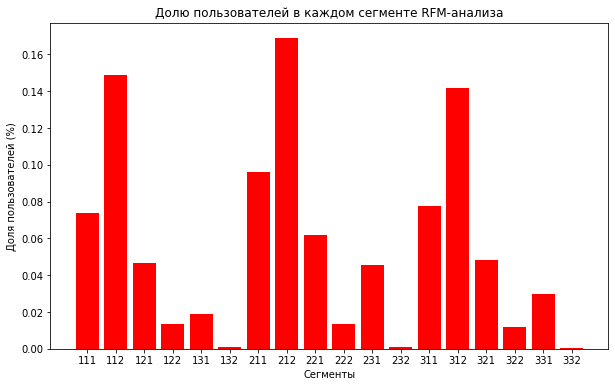

   rfm_group  user_id  user_share
7        212      408    0.168874
1        112      359    0.148593
13       312      343    0.141970
6        211      232    0.096026
12       311      188    0.077815
0        111      179    0.074089
8        221      150    0.062086
14       321      117    0.048427
2        121      113    0.046772
10       231      110    0.045530
16       331       72    0.029801
4        131       46    0.019040
3        122       33    0.013659
9        222       32    0.013245
15       322       28    0.011589
5        132        3    0.001242
11       232        2    0.000828
17       332        1    0.000414


In [13]:
# Группируем данные по сегментам и считаем их размер

rfm_group = df_order_rfm.groupby('rfm_group').agg({'user_id':'nunique'}).reset_index()

# Считаем долю пользователей в каждом сегменте

rfm_group['user_share'] = rfm_group['user_id'] / rfm_group['user_id'].sum()

# Визуализируем долю пользователей в каждом сегменте

plt.figure(figsize=(10, 6))
plt.bar(rfm_group['rfm_group'], rfm_group['user_share'], color='red')
plt.title('Долю пользователей в каждом сегменте RFM-анализа')
plt.ylabel('Доля пользователей (%)')
plt.xlabel('Сегменты')
plt.show()

# Выводим результат

print(rfm_group.sort_values(by='user_id', ascending=False))

Результаты RFM-анализа показывают, что:

- Самые многочисленные сегменты — это `212`, `112` и `312`. Значит, основная часть пользователей делает редкие покупки среднего размера с разной степенью давности ("давно", "прошло какое-то время", "совсем недавно")

- Сегмент самой лояльной аудитории (`333`) по результатам данного RFM-анализа - не представлен

- Сегменты `132`, `232`, `332` почти не представлены (менее 1%). В них собраны пользователи с редкими паттернами поведения

Таким образом, мы можем сделать следующие выводы:

- Сегменты с высокими показателями всех метрик  — это самые активные и ценные клиенты. Их стоит удерживать с помощью персонализированных предложений, программ лояльности и эксклюзивных акций
- Активные клиенты с потенциалом роста совершали покупки недавно и перспективны для вовлечения. Важно поддерживать их вовлечённость, повышать интерес к продукту и стимулировать к повторным покупкам. Сюда относятся сегменты `312`, `311`, `212`, `211`. 
- Неактивные клиенты давно не делали покупок, но среди них есть те, кто может принести прибыль. Чтобы вернуть их, стоит разработать специальные предложения, направленные на возврат клиентов. К неактивным клиентам сейчас относятся сегменты `111`, `112`, `121`, `122`. 

---

## 4. K-Means кластеризация

С помощью метода K-Means разделим рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

Подготовим данные для кластеризации и для каждого ресторана подсчитаем:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [14]:
# Подготавливаем данные для кластеризации

delivery_grouped = df_order.groupby('rest_id').agg(
    # Общее количество заказов:    
    orders = ('order_id', 'count'),
    # Средняя стоимость заказа: 
    avg_price = ('revenue', 'mean'),
    # Общее число заказанных уникальных блюд: 
    dishes = ('object_id', 'nunique')
).reset_index()

# Выводим результат

print(delivery_grouped)

                             rest_id  orders    avg_price  dishes
0   1be5a933aab34fbab594bebba48e976e     144  2260.180222     137
1   1d6bb74687104fa1953924c9684fe624     108  2959.256481     104
2   2c6095730b514c189ee41c65f03febc3       8  1673.000000       7
3   3247a3b5f9494812a3c1a73c5b61f004      33  2777.209697      33
4   39b7eab4f4704ed2886fafe171489960      33  2011.269697      32
5   43e40bacafe8409bb5592877a42d737e      43  3313.064186      42
6   4a693ca500b44ba499f92a724aec5f17     107  2989.588785     104
7   4b9cde3378c447ed81c2c6d4854d4f7e       7  2544.000000       7
8   55d4027ac83e438f9f893892f6903409    1001  2674.652364     870
9   55d6470712ee48e98509478ad6aa18ee       5  4754.400000       5
10  56edd124dfa44656afe0c0d041eba562     135  1507.735289     132
11  59fc1a894303462e8205a759d906499c      77  1874.545455      73
12  5b262d151ec1410e94602e422c525c3d      48  1706.891667      48
13  815a6b063cd84005b02b1fc3b48af951     102  1778.322824      99
14  8c9307

После группировки данных мы получили таблицу с идентификатором ресторана (`rest_id`), общим количеством заказов (`orders`), средней стоимостью заказа (`avg_price`), общим числом заказанных уникальных блюд (`dishes`), которая будет использована для кластеризации

Для нахождения оптимального количества кластеров воспользуемся методом `.inertia_`, который покажет суммарное внутрикластерное расстояние, а также построим график зависимости инерции от числа кластеров (метод "локтя"), который позволит визуально оценить оптимальное количество кластеров. Перед этим не забудем нормализовать данные для корректной работы метода `.inertia_`

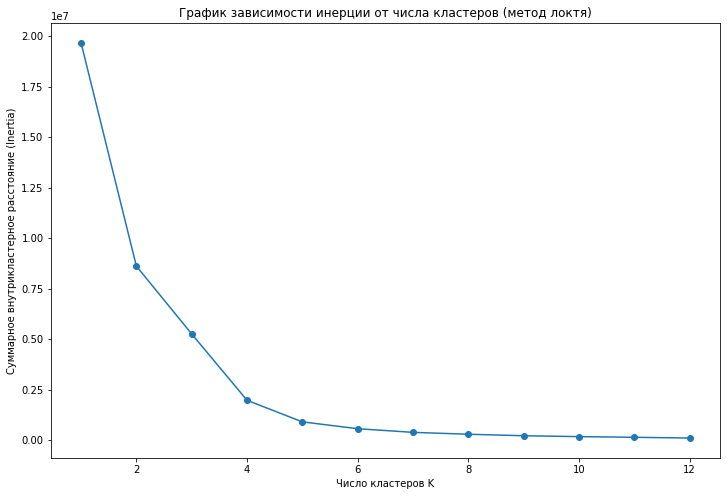

In [15]:
# Нормализуем данные

delivery_grouped_clear = delivery_grouped.drop('rest_id', axis=1)

# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров

i = []

# Задаём диапазон количества кластеров

min_k = 1
max_k = 12

plt.figure(figsize=(12, 8))

# Перебираем разное количество кластеров

for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(delivery_grouped_clear)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров

plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

При числе кластеров `K=4` график начинает показывать "плавный" спад, а значит, эта точка является локтём, то есть, соответствует оптимальному количеству кластеров - **4**

Данные - готовы, оптимальное количество кластеров - найдено, следовательно, можно приступать к проведению кластеризации

In [16]:
# Создаём переменные

kmeans = KMeans(n_clusters=4, random_state=1)
labels = kmeans.fit_predict(delivery_grouped_clear)

# Сортируем кластеры по возрастанию «Общего количества заказов» (первый столбец, индекс 0)

sorted_indices = np.argsort(kmeans.cluster_centers_[:, 0])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Создаём DataFrame из центроидов

centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Общее количество заказов', 'Средняя стоимость заказа', 'Общее число заказанных уникальных блюд'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (0 знаков после точки)

pd.options.display.float_format = '{:.0f}'.format

# Выводим таблицу

print(centroids_df.head())

           Общее количество заказов  Средняя стоимость заказа  Общее число заказанных уникальных блюд
Кластер 1                        65                      3025                                      63
Кластер 2                        72                      1932                                      69
Кластер 3                        84                      4658                                      82
Кластер 4                      1100                      2499                                     948


В результате мы получили таблицу со средними значениями признаков. Каждый из 4-х кластеров имеет свою отличительную особенность:

- **Кластер 1:** пользователи с наименьшим количеством заказов и блюд
- **Кластер 2:** пользователи с наименьшей средней стоимостью заказа
- **Кластер 3:** пользователи с наибольшей средней стоимостью заказа
- **Кластер 4:** пользователи с наибольшим количеством заказов и блюд

Проанализировав данные по каждому кластеру, можно прийти к следующим выводам:

- **Кластер 1**, **Кластер 2** и **Кластер 3** имеют примерное равно общее количество заказов и блюд, при этом, средняя стоимость заказа пользователей из **Кластера 1** на 1100 рублей больше, чем в **Кластере 2**, а средняя стоимость заказа пользователей из **Кластера 3** на 1600 рублей больше, чем в **Кластере 1**

- **Кластер 4** выступает в роли самого прибыльного кластера по показателю выручки (общее количество заказов * среднюю стоимость заказа). Однако, при более детальных расчётах, стоит учитывать показатели стоимости доставки (`delivery`) и комиссии (`commission`), которые существенно влияют на прибыль компании

Также визуализируем результаты, чтобы проследить зависимость признаков друг от друга. Для этого построим две визуализации, на которые нанесём все кластеры:

- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

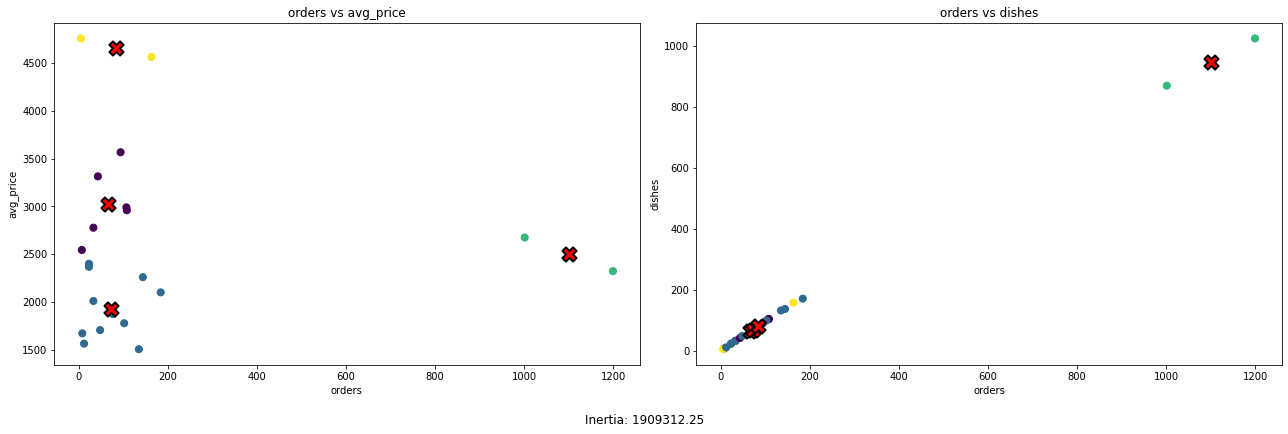

In [17]:
# Получаем координаты центров (центроидов) кластеров

centroids = kmeans.cluster_centers_

# Создаём 2 графика (1 строка × 2 столбца) для отображения попарных комбинаций признаков

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Список названий признаков, которые будут использоваться на графиках

axs = ["orders", "avg_price", "dishes"]

# Перебираем пары признаков: (orders vs avg_price), (orders vs dishes)

for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
    
   axes[i].scatter(
       delivery_grouped_clear[x_label],  # Значения по оси X
       delivery_grouped_clear[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
    
   axes[i].scatter(
       centroids[:, x_idx],  # X-координаты центров
       centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
    
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'{x_label} vs {y_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией

plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)

fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций

plt.show()

На основе анализа данных графиков можно сделать следующие выводы:

- Средний чек (`avg_price`) не зависит от количества заказов (`orders`): на левом графике мы видим, что фиолетовый (**Кластер 1**), синий (**Кластер 2**) и жёлтый (**Кластер 3**) обладают примерно одинаковым количеством заказов, но средний чек - сильно отличается. Также стоит отметить, что зеленый (**Кластер 4**) обладает ещё большим количеством заказов, но средний чек находится примерно посередине между синим (**Кластером 2**) и фиолетовым (**Кластером 1**)

- Количество блюд (`dishes`) прямопрорционально зависит от количества заказов (`orders`): на правом графике мы видим, что фиолетовый (**Кластер 1**), синий (**Кластер 2**) и жёлтый (**Кластер 3**) обладают меньшим (по сравнению с **Кластером 4**) количеством заказов на уровне 0-200 и меньшим (по сравнению с **Кластером 4**) числом блюд на уровне 0-200, в то время как зелёный (**Кластер 4**) обладает большим (по сравнению с **Кластерами 1, 2 и 3**) количеством заказов на уровне 1.000-1.200 и большим (по сравнению с **Кластерами 1, 2 и 3**) числом блюд на уровне 900-1.100

---

## 5. Итоговый вывод и рекомендации

Вывод и рекомендации представлены в формате ответов на поставленные заказчиком вопросы:
    
- **Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?**

Для того, чтобы пользователи продолжали пользоваться продуктом, необходимо:

- Для активных клиентов (недавние и частые покупки с большой суммой трат): 
    - внедрить систему персонализированных предложений: ранний доступ к новинкам, подборка ресторанов на основе их истории покупок и просмотров
    - внедрить систему программ лояльности: повышенный кэшбэк, бесплатная доставка, бесплатный сервис или подарки к покупкам
    - внедрить систему эксклюзивных акций: не публикуемые в общем доступе промокоды с повышенным кэшбэком или подарком к покупке
- Для менее активных клиентов, но с потенциалом роста (недавние, но редкосовершаемые покупки с большой суммой трат): 
    - поддерживать вовлечённость: сообщения о том, что пользователи близки к получению статуса в программе лояльности
    - повышать интерес к продукту: персональные приглашения, бесплатный доступ к платным услугам 
    - стимулировать к новым покупкам: сниженные цены в период праздничный дней
- Для неактивных клиентов (давние и редкосовершаемые покупки с малой суммой трат): 
    - разработать специальные предложения, направленные на возврат клиентов: большие скидки, бесплатный пробный период на использование обновлённой версии продукта без платных подписок, персональные звонки от менеджеров с призывом вернуться в сервис на сниженных к доставке условиям


- **Какой путь проходят пользователи в сервисе? Где «проваливаются»?**

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

Пользователи "проваливаются" на этапе перехода от страницы регистрации к подтверждению телефона (около 45%) и на этапе перехода от подтверждения телефона к странице с блюдом (около 28%) - всё это происходит именно на мобильной версии

Для того, чтобы устранить провалы, необходимо:

- Поработать над пользовательским путём: наибольшая потеря пользователей наблюдается на этапе перехода от страницы регистрации к подтверждению телефона (около 45%) и на этапе перехода от подтверждения телефона к странице с блюдом (около 28%). Причём, происходит это именно на мобильных устройствах

Также рекомендуется упростить UI/UX для пользователей десктопной версии, поскольку наибольшее медианное время ожидания перехода с этапа подтверждения телефона на страницу с блюдом - у десктопных пользователей (выше чем у мобильных пользователей почти на 2 минуты)

- **Как улучшить взаимодействие с партнёрами-ресторанами?**

Для улучшения взаимодействия с партнёрами-ресторанами необходимо обратить внимание на:

- Отсутствие зависимости среднего чека от количества заказов: то есть, стоит изучить факторы, которые объяснят, почему данные метрики не связаны друг с другом (или всё же корреляция есть, но она скрыта)

- Прямопропорциональную зависимость количества блюд от количества заказов: чем больше заказов - тем больше количество уникальных блюд, которые пробуют пользователи. Именно с увеличением количества заказов можно наблюдать охват всего ассортимента, который предлагают рестораны - соответственно, пользователи будут чаще возвращаться в данный сервис (повышается показатель удержания пользователей), поскольку у них будет возможность попробовать разные блюда, а не прибегать к выбору одних и тех же блюд. Благодаря этому, компания может сохранять лояльность ресторанов и сотрудничество с ними на хороших условиях, при этом наращивая стоимость доставки и комиссии, взимаемой с ресторанов, что непосредственно приведёт к увеличению прибыли сервиса доставки "Всё.из.кафе"

- Показатель конверсии целевого действия: при должном внимании показатель конверсии, на данный момент равный 32%, можно увеличить на 8-10% за счёт внедрения новых маркетинговых компаний. Лучше всего использовать онлайн-рекламу, например, контекстную рекламу, таргетированную рекламу, баннеры с рекламой в видеохостингах или на стримах, email-рассылки, нативная реклама в статьях и блогах, инфлюенс-реклама от блогеров, рекламные интеграции в мобильных приложениях и прочие каналы привлечения новых пользователей. Засчёт этого может возникнуть приток новых пользователей как для ресторанов, так и для сервиса доставки "Всё.из.кафе"